<a href="https://colab.research.google.com/github/LamineGith/PyTorch/blob/main/Autoencodder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# Define the transform to preprocess the data
transform = transforms.Compose([transforms.ToTensor()])
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
# Load the MNIST dataset
mnist_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Define the data loader
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)


In [49]:
mnist_data.classes


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [51]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32))
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid())

    def forward(self, x):
        latent = self.encoder(x)
        x = self.decoder(latent)
        return x,latent

# Define the model and move it to the device
model = Autoencoder()
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.parameters

<bound method Module.parameters of Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Sigmoid()
  )
)>

In [36]:

# Train the model
for epoch in range(10):
    for data in data_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(device)

        output, latent = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, 10, loss.item()))

Epoch [1/10], Loss: 0.0288
Epoch [2/10], Loss: 0.0210
Epoch [3/10], Loss: 0.0199
Epoch [4/10], Loss: 0.0156
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0136
Epoch [7/10], Loss: 0.0129
Epoch [8/10], Loss: 0.0142
Epoch [9/10], Loss: 0.0121
Epoch [10/10], Loss: 0.0107


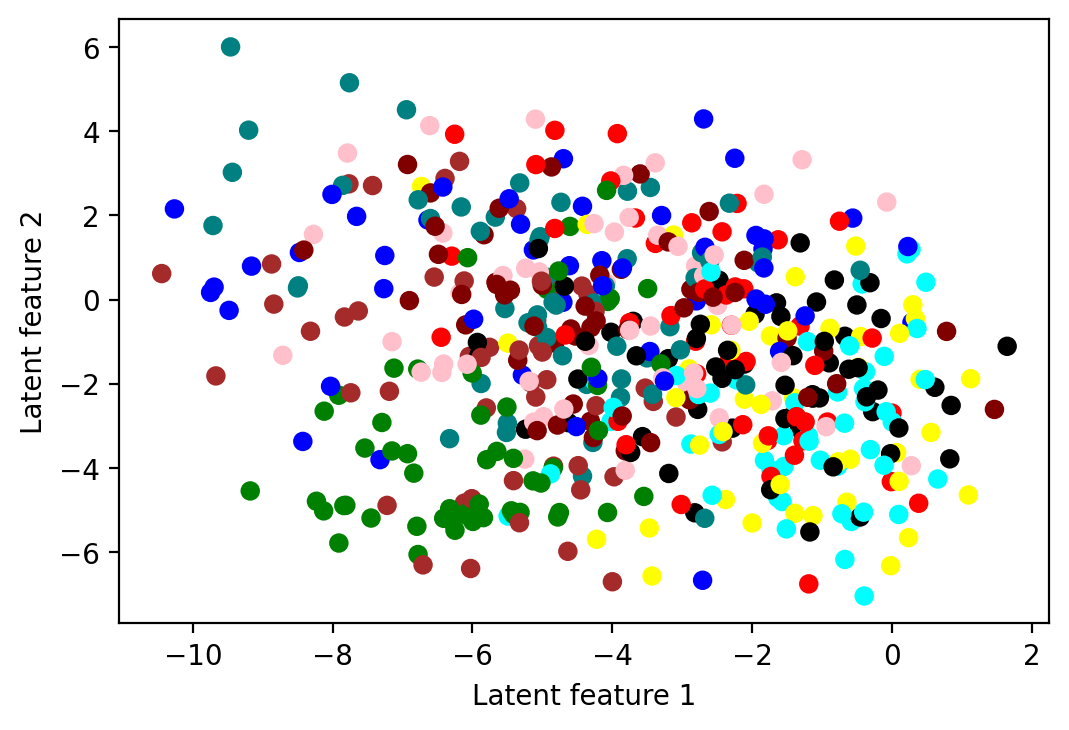

In [43]:
# Visualize the original and reconstructed images
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

dataloader = DataLoader(mnist_data, batch_size=512, shuffle=True)
for data in dataloader:
        img, labels = data
        img = img.view(img.size(0), -1)    
        model.cpu()    
        _,latent = model(img)
        break

d = {0: 'red', 1: "green", 2: "blue", 3: "maroon", 4: "yellow", 
     5: "pink", 6: "brown", 7: "black", 8: "teal", 9: "aqua"}

colors = []       
for e in labels.numpy():
    colors.append(d[e])

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
ax.set_xlabel('Latent feature 1')
ax.set_ylabel('Latent feature 2')

ax.scatter(latent[:,0].detach().numpy(), latent[:,1].detach().numpy(), 
           c=list(colors))